<a href="https://colab.research.google.com/github/arjunb00/MD/blob/main/MD_Smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
import cv2
import pandas as pd
import numpy as np
import sklearn
import os
from PIL import Image
import matplotlib.pyplot as plt


drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
os.chdir('gdrive/My Drive/SmartphoneImages/')  #change dir

In [3]:
metadata = pd.read_csv('Dataset/metadata.csv')
metadata = metadata.dropna()

In [4]:
# from google.colab.patches import cv2_imshow
# from PIL import Image
# import glob
# import argparse
# import imutils
# import cv2


# image_list = []

# x = 0
# for filename in glob.glob('Dataset/Thresholds/*.png'):
#   threshold = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
#   th2 = threshold.copy()
#   th2 = cv2.subtract(255, th2) 
#   cnts = cv2.findContours(th2, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#   cnts = imutils.grab_contours(cnts)
#   boolx = False
#   for c in cnts:
#     # compute the center of the contour
#     M = cv2.moments(c)
#     if M["m00"] != 0:
#       cX = int(M["m10"] / M["m00"])
#       cY = int(M["m01"] / M["m00"])
#     else:
#       cX, cY = 0, 0
#     # draw the contour and center of the shape on the image

#     contours = []
#     if (50 <= cX <=75) and (50 <= cY <=75) and cv2.contourArea(c)>= 400:
#       boolx = True
#       contours.append(c)
#       cv2.drawContours(th2, [c], -1, (0, 255, 0), 2)
#       cv2.circle(th2, (cX, cY), 7, (255, 255, 255), -1)
#       cv2.putText(th2, "center", (cX - 20, cY - 20),
#       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

#     for x in contours: 
#       mask = np.zeros_like(th2)
#       # cv2.drawContours(mask, x, -1, 255, 2) # Draw filled contour in mask
#       cv2.fillPoly(mask, pts =[x], color=(255,255,255))
#       fn = 'Dataset/Masks/'+ filename[19:]
#       cv2.imwrite(fn, mask)

#       cv2_imshow(mask)
      


    


    
#   if boolx == True:
#     x+=1
#     # show the image
#   cv2_imshow(th2)




In [5]:
# from PIL import Image
# import glob
# import argparse
# import imutils
# import cv2

# x = 0
# for filename in glob.glob('Dataset/Masks/*.png'):
#   mask = cv2.imread(filename)
#   mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
  

#   x += 1
  
#   fn = 'Dataset/ImagesResizedRedone/' + filename[14:]
#   img = cv2.imread(fn)

#   masked = cv2.bitwise_and(img, img, mask=mask)


#   # get first masked value (foreground)
#   # fg = cv2.bitwise_or(img, img, mask=mask)

#   # # get second masked value (background) mask must be inverted
#   # mask = cv2.bitwise_not(mask)
#   # background = np.full(img.shape, 255, dtype=np.uint8)
#   # bk = cv2.bitwise_or(background, background, mask=mask)

#   # # combine foreground+background
#   # final = cv2.bitwise_or(fg, bk)

#   y = 'Dataset/MaskedLesions/'+ filename[14:]
#   cv2.imwrite(y, masked)
#   cv2_imshow(masked)

# print(x)

In [6]:
# import imutils

# for filename in glob.glob('Dataset/Masks/*.png'):
#   mask = cv2.imread(filename)
#   mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
  
#   mask2 = mask.copy()
#   # mask2 = cv2.subtract(255, mask2) 
#   cnts = cv2.findContours(mask2, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#   cnts = imutils.grab_contours(cnts)
#   M = cv2.moments(cnts[0])
#   cX = int(M["m10"] / M["m00"])
#   cY = int(M["m01"] / M["m00"])

#   # draw the contour and center of the shape on the image
#   cv2.drawContours(mask2, [cnts[0]], -1, (0, 255, 0), 2)
#   cv2.circle(mask2, (cnts[0][0][0][0],cnts[0][0][0][1]), 3, (120, 0, 0), -1)
#   c = cnts[0]


#   for i in c:
#     point = i[0]
#     cv2.circle(mask2, (point[0],point[1]), 1, (120, 0, 0), -1)
#     # xDistance = abs(cX-point[0])
#     # yDistance = abs(cY-point[1])
#     # print(xDistance,yDistance)

#   # show the image
#   cv2_imshow(mask2)

In [7]:
# c = cnts[0]


# for i in c:
#   point = i[0]
  
#   xDistance = abs(cX-point[0])
#   yDistance = abs(cY-point[1])
#   print(xDistance,yDistance)

# print(len(c))

In [8]:
from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import argparse
import imutils
import cv2


finalImagesMetadata = metadata.copy()
imageFilenames = []
x = 0
for filename in glob.glob('Dataset/MaskedLesions/*.png'):
  if filename[22:] in list(finalImagesMetadata['img_id']):
    imageFilenames.append(filename[22:])


    
# print(finalImagesMetadata['img_id'])

In [9]:
imageFilenames

finalImagesMetadata = finalImagesMetadata[finalImagesMetadata['img_id'].isin(imageFilenames)]

In [10]:
finalImagesMetadata.columns

Index(['patient_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')

In [11]:
finalImagesMetadata.drop(labels=['patient_id', 'background_father', 'background_mother', 'pesticide', 'has_piped_water', 'has_sewage_system', 'biopsed'], axis=1, inplace = True)

In [12]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    dummies.add_suffix(feature_to_encode + '_')
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.drop(feature_to_encode, axis = 1, inplace = True)
    return(res)




In [13]:
features_to_encode = ['itch', 'grew', 'hurt', 'changed', 'bleed', 'region']
for feature in features_to_encode:
    finalImagesMetadata = encode_and_bind(finalImagesMetadata, feature)

In [14]:
finalImagesMetadata.columns

Index(['smoke', 'drink', 'age', 'gender', 'skin_cancer_history',
       'cancer_history', 'fitspatrick', 'diameter_1', 'diameter_2',
       'diagnostic', 'elevation', 'img_id', 'itch_FALSE', 'itch_TRUE',
       'itch_UNK', 'grew_FALSE', 'grew_TRUE', 'grew_UNK', 'hurt_FALSE',
       'hurt_TRUE', 'hurt_UNK', 'changed_FALSE', 'changed_TRUE', 'changed_UNK',
       'bleed_FALSE', 'bleed_TRUE', 'bleed_UNK', 'region_ABDOMEN',
       'region_ARM', 'region_BACK', 'region_CHEST', 'region_EAR',
       'region_FACE', 'region_FOOT', 'region_FOREARM', 'region_HAND',
       'region_NECK', 'region_NOSE', 'region_THIGH'],
      dtype='object')

In [15]:
finalImagesMetadata.head()

,smoke,drink,age,gender,skin_cancer_history,cancer_history,fitspatrick,diameter_1,diameter_2,diagnostic,...,region_BACK,region_CHEST,region_EAR,region_FACE,region_FOOT,region_FOREARM,region_HAND,region_NECK,region_NOSE,region_THIGH
12,False,False,61,MALE,True,False,2,10.0,10.0,BCC,...,0,1,0,0,0,0,0,0,0,0
14,False,False,60,FEMALE,False,True,3,10.0,8.0,BCC,...,0,0,0,1,0,0,0,0,0,0
36,False,False,51,FEMALE,True,True,3,6.0,4.0,NEV,...,1,0,0,0,0,0,0,0,0,0
54,False,False,49,FEMALE,False,False,2,23.0,20.0,MEL,...,0,0,0,0,0,0,0,0,0,1
66,False,True,70,MALE,False,False,2,18.0,13.0,SCC,...,0,1,0,0,0,0,0,0,0,0


In [16]:
def categorise(row):  
    if row['diagnostic'] == 'MEL':
        return 1
    elif row['diagnostic'] != 'MEL':
      return 0

finalImagesMetadata['output'] = finalImagesMetadata.apply(lambda row: categorise(row), axis=1)


In [17]:
finalImagesMetadata.columns

Index(['smoke', 'drink', 'age', 'gender', 'skin_cancer_history',
       'cancer_history', 'fitspatrick', 'diameter_1', 'diameter_2',
       'diagnostic', 'elevation', 'img_id', 'itch_FALSE', 'itch_TRUE',
       'itch_UNK', 'grew_FALSE', 'grew_TRUE', 'grew_UNK', 'hurt_FALSE',
       'hurt_TRUE', 'hurt_UNK', 'changed_FALSE', 'changed_TRUE', 'changed_UNK',
       'bleed_FALSE', 'bleed_TRUE', 'bleed_UNK', 'region_ABDOMEN',
       'region_ARM', 'region_BACK', 'region_CHEST', 'region_EAR',
       'region_FACE', 'region_FOOT', 'region_FOREARM', 'region_HAND',
       'region_NECK', 'region_NOSE', 'region_THIGH', 'output'],
      dtype='object')

In [18]:
finalImagesMetadata.output.value_counts()

0    142
1     29
Name: output, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

trainpre, test = train_test_split(finalImagesMetadata, test_size=0.2, random_state=41, stratify=finalImagesMetadata.output)

train, val = train_test_split(trainpre, test_size=0.2, random_state=41, stratify=trainpre.output)



In [20]:
print(train.output.value_counts(), test.output.value_counts(), val.output.value_counts())

0    90
1    18
Name: output, dtype: int64 0    29
1     6
Name: output, dtype: int64 0    23
1     5
Name: output, dtype: int64


In [21]:
import shutil, os
os.chdir('Dataset/MaskedLesions/') 


files = glob.glob('Test/*.png')
for f in files:
    os.remove(f)

files = glob.glob('Train/*.png')
for f in files:
    os.remove(f)

files = glob.glob('Val/*.png')
for f in files:
    os.remove(f)

files = glob.glob('Test/0/*.png')
for f in files:
    os.remove(f)

files = glob.glob('Test/1/*.png')
for f in files:
    os.remove(f)

files = glob.glob('Train/0/*.png')
for f in files:
    os.remove(f)

files = glob.glob('Train/1/*.png')
for f in files:
    os.remove(f)


files = glob.glob('Val/0/*.png')
for f in files:
    os.remove(f)

files = glob.glob('Val/1/*.png')
for f in files:
    os.remove(f)

for i,row in test.iterrows():
        id = row['img_id']
        if row.output == 0:
          shutil.copy(id, 'Test/0')
        elif row.output == 1:
          shutil.copy(id, 'Test/1')

for i,row in train.iterrows():
        id = row['img_id']
        if row.output == 0:
          shutil.copy(id, 'Train/0')
        elif row.output == 1:
          shutil.copy(id, 'Train/1')


for i,row in val.iterrows():
        id = row['img_id']
        if row.output == 0:
          shutil.copy(id, 'Val/0')
        elif row.output == 1:
          shutil.copy(id, 'Val/1')



In [22]:
train.output.value_counts()

train = train.reset_index()
test = test.reset_index()
# val = val.reset_index()

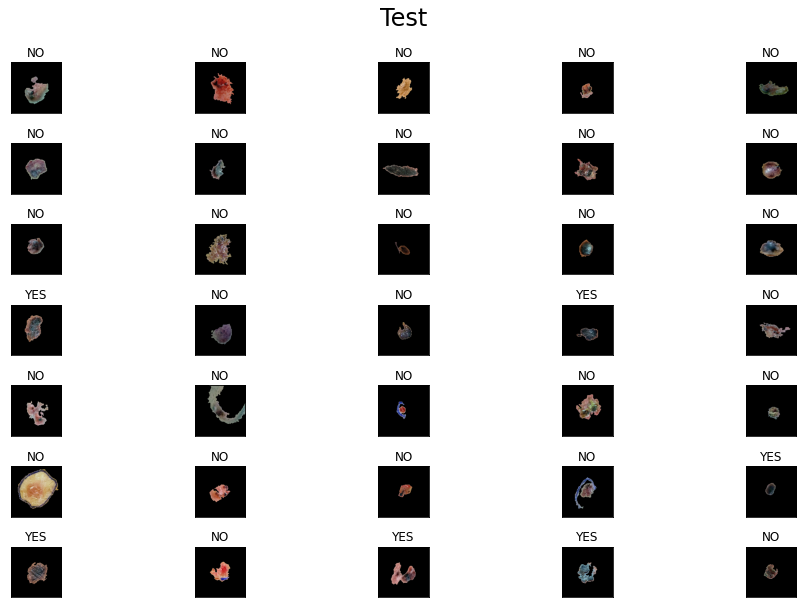

In [44]:
import os
import cv2
import imutils as imutils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # machine learning
from tqdm import tqdm # make your loops show a smart progress meter 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

%matplotlib inline
def plot_imgs(title, dfcol):
    fig = plt.figure(figsize=(14, 8), dpi=72)
    fig.suptitle(title, fontsize=24, y=1.05)
    for i,row in dfcol.iterrows():
        img = cv2.imread(row['img_id'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(int(len(dfcol.index)/5), 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        subtitle = 'YES' if row['output'] == 1 else 'NO'
        plt.title(subtitle)
        plt.imshow(img)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
    plt.show()
    
    
plot_imgs("Test", test)


In [45]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

RANDOM_SEED = 1
IMG_SIZE = (128, 128) # size of vgg16 input



train_generator = train_datagen.flow_from_directory(
    'Train/',
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=8,
    class_mode='binary',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    'Val/',
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=2,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 108 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


## VGG16

In [62]:

base_model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(128, 128, 3)
)

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_2 (Dropout)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 14,722,881
Trainable params: 14,722,881
Non-trainable params: 0
_________________________________________________________________


In [63]:
EPOCHS = 10



early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=6
)

history = model.fit(
    train_generator,
    steps_per_epoch= len(train)//32,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(train)//16,
    callbacks=[early_stopping]
)

print("Training Done")
model.save("model.h5")

Epoch 1/10
3/3 [==============================] - 1s 210ms/step - loss: 15.6417 - accuracy: 0.5833 - val_loss: 4.0704 - val_accuracy: 0.9167
Epoch 2/10
3/3 [==============================] - 0s 108ms/step - loss: 11.4234 - accuracy: 0.6667 - val_loss: 0.8316 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 125ms/step - loss: 2.4093 - accuracy: 0.5500 - val_loss: 0.5816 - val_accuracy: 0.7500
Epoch 4/10
3/3 [==============================] - 0s 113ms/step - loss: 1.8450 - accuracy: 0.5833 - val_loss: 0.5716 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 0s 107ms/step - loss: 0.6771 - accuracy: 0.6667 - val_loss: 0.5605 - val_accuracy: 0.8333
Epoch 6/10
3/3 [==============================] - 0s 111ms/step - loss: 0.4983 - accuracy: 0.7500 - val_loss: 0.4903 - val_accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 0s 106ms/step - loss: 0.3783 - accuracy: 0.8750 - val_loss: 1.0783 - val_accuracy: 0.7500
Training Done


In [64]:
Test_Path  = 'Test/'

def preprocess_imgs(path, img_size):
    set_new = []
    for value in os.listdir(path):
        for img in os.listdir(path + value):
            img = cv2.imread(path + value + "/" + img)
            img = cv2.resize(
                img,
                dsize=img_size,
                interpolation=cv2.INTER_CUBIC
            )
            set_new.append(tf.keras.applications.vgg16.preprocess_input(img))
    
    return np.array(set_new)

test_data = preprocess_imgs(Test_Path, img_size=IMG_SIZE)

reality = []
for value in os.listdir(Test_Path):
    for img in os.listdir(Test_Path + value):
        reality.append(1) if value == "1" else reality.append(0)
        
predictions = model.predict(test_data)
predictions = [0 if x < 0.5 else 1 for x in predictions]

accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8285714285714286


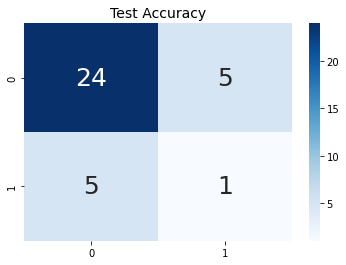

In [56]:


confusion_mtx = confusion_matrix(reality, predictions)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,annot_kws={"size": 25}, cmap="Blues", ax = ax)
ax.set_title('Test Accuracy', size=14)
plt.show()



In [29]:
confusion_mtx

array([[16, 13],
       [ 5,  1]])

## ResNet50

In [74]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


base_model = ResNet50(include_top = False, input_shape=(128, 128, 3))

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_10 (Flatten)        (None, 32768)             0         
                                                                 
 dropout_5 (Dropout)         (None, 32768)             0         
                                                                 
 dense_10 (Dense)            (None, 1)                 32769     
                                                                 
Total params: 23,620,481
Trainable params: 32,769
Non-trainable params: 23,587,712
_________________________________________________________________
